### First Machine Learning Method: Simple Linear Regression

The data set called Highway1 (used by  by Carl Hoffstedt in his paper: https://rdrr.io/rforge/alr4/man/Highway1.html) relate the automobile accident rate, in accidents per million vehicle miles to several potential terms. The data include 39 sections of large Highways in the state of Minnesota in 1973. The goal of this analysis is to see how the rate variable are affetcted by some of the variables that are highly correlated with the rate and finding out which ones affect the rate variable the most.

This data frame contains the following columns:

adt - average daily traffic count in thousands

trks - truck volume as a percent of the total volume

lane - total number of lanes of traffic

acpt - number of access points per mile

sigs - number of signalized interchanges per mile

itg - number of freeway-type interchanges per mile

slim - speed limit in 1973

len - length of the Highway segment in miles

lwid - lane width, in feet

shld - width in feet of outer shoulder on the roadway

htype - An indicator of the type of roadway or the source of funding for the road; "mc" for major collector, "fai" for Federal interstate highways, "pa" for principal arterial highway, and "ma" for major arterial highways

rate - 1973 accident rate per million vehicle miles

#### Each problem is worth 10 points

### Problem 1
Upload highway1 data to jupyter notebook, and remove the unnecessary column called "Column 0". After removing null values (if any), find the correlation matrix of all the remaining columns. In this data, the rate is the dependent variable. Which independent variable has the highest positive correlation with the 'rate' variable? Similarly, which independent variable has the highest negative correlation with the 'rate' variable? 

In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Hints: Make sure to import the following packages together 
#with other packages we have been using. Linear model is within statmodels.
import statsmodels.api as sm

In [31]:
data0 = pd.read_csv('Highway1.csv')

In [32]:
data = data0.drop('Unnamed: 0', 1)

In [33]:
data.dropna()

,rate,len,ADT,trks,sigs1,slim,shld,lane,acpt,itg,lwid,hwy
0,4.58,4.99,69,8,0.200401,55,10,8,4.6,1.20,12,FAI
1,2.86,16.11,73,8,0.062073,60,10,4,4.4,1.43,12,FAI
2,3.02,9.75,49,10,0.102564,60,10,4,4.7,1.54,12,FAI
3,2.29,10.65,61,13,0.093897,65,10,6,3.8,0.94,12,FAI
4,1.61,20.01,28,12,0.049975,70,10,4,2.2,0.65,12,FAI
5,6.87,5.97,30,6,2.007504,55,10,4,24.8,0.34,12,PA
6,3.85,8.57,46,8,0.816686,55,8,4,11.0,0.47,12,PA
7,6.12,5.24,25,9,0.570840,55,10,4,18.5,0.38,12,PA
8,3.29,15.79,43,12,1.453331,50,4,4,7.5,0.95,12,PA
9,5.88,8.26,23,7,1.331065,50,5,4,8.2,0.12,12,PA


In [34]:
data.corr()

,rate,len,ADT,trks,sigs1,slim,shld,lane,acpt,itg,lwid
rate,1.000000,-0.465290,-0.028570,-0.512522,0.603191,-0.680984,-0.386907,-0.032979,0.752025,-0.024841,-0.005619
len,-0.465290,1.000000,-0.271569,0.495943,-0.391851,0.186243,-0.104926,-0.202504,-0.238706,-0.247562,-0.310650
ADT,-0.028570,-0.271569,1.000000,-0.096682,0.159381,0.244157,0.457307,0.823930,-0.223980,0.903701,0.127878
trks,-0.512522,0.495943,-0.096682,1.000000,-0.475308,0.296184,0.006135,-0.153324,-0.360266,-0.067231,-0.155271
sigs1,0.603191,-0.391851,0.159381,-0.475308,1.000000,-0.424415,-0.124103,0.263967,0.513461,0.087017,0.062084
slim,-0.680984,0.186243,0.244157,0.296184,-0.424415,1.000000,0.689009,0.264520,-0.681521,0.241282,0.098693
shld,-0.386907,-0.104926,0.457307,0.006135,-0.124103,0.689009,1.000000,0.481771,-0.424951,0.375022,-0.042896
lane,-0.032979,-0.202504,0.823930,-0.153324,0.263967,0.264520,0.481771,1.000000,-0.208779,0.697913,0.095723
acpt,0.752025,-0.238706,-0.223980,-0.360266,0.513461,-0.681521,-0.424951,-0.208779,1.000000,-0.200158,-0.042013
itg,-0.024841,-0.247562,0.903701,-0.067231,0.087017,0.241282,0.375022,0.697913,-0.200158,1.000000,0.102883


'rate' is the dependent variable. 
The variable with the highest positive correlation with the rate variable is acpt.
The variable with the highest negative correlation with the rate variable is slim.

#### Read more about statmodels linear regression here.
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

### Problem 2
Let $y$ be to the column 'rate' and $x$ to be the column  that has the highest positive correlation. Make a linear regression model with $x$ as independent and $y$ as a dependent variable and report the the coefficients $\beta_0$ and $\beta_1$ in the linear regression equation $y\approx \beta_0 +\beta_1 x$. Report $R^2$ value from the model and explain in a paragraph, why is this $R^2$ value low here. Read more about $R^2$ value here.
https://statisticsbyjim.com/regression/interpret-r-squared-regression/

In [41]:
Y = data['rate']
Y = sm.add_constant(Y)
Y

,const,rate
0,1.0,4.58
1,1.0,2.86
2,1.0,3.02
3,1.0,2.29
4,1.0,1.61
5,1.0,6.87
6,1.0,3.85
7,1.0,6.12
8,1.0,3.29
9,1.0,5.88


In [42]:
X = data['acpt']
X

0      4.6
1      4.4
2      4.7
3      3.8
4      2.2
5     24.8
6     11.0
7     18.5
8      7.5
9      8.2
10     5.4
11    11.2
12    15.2
13     5.4
14     7.9
15     3.2
16    11.0
17     8.9
18    12.4
19     7.8
20     9.6
21     4.3
22    11.1
23     6.8
24    53.0
25    17.3
26    27.3
27    18.0
28    30.2
29    10.3
30    18.2
31    12.3
32     7.1
33    14.0
34    11.3
35    16.3
36     9.6
37     9.0
38    10.4
Name: acpt, dtype: float64

In [43]:
model = sm.OLS(X, Y)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   acpt   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     48.16
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           3.41e-08
Time:                        12:59:01   Log-Likelihood:                -125.62
No. Observations:                  39   AIC:                             255.2
Df Residuals:                      37   BIC:                             258.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7195      2.234     -0.770      0.446      -6.247       2.808
rate           3.5284      0.508      6.940      0.000       2.498       4.559
==============================================================================
Omnibus:                       14.518   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.335
Skew:                           1.026   Prob(JB):                     3.84e-05
Kurtosis:                       5.881   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝛽0 is the constant with the value of -1.7195 and 𝛽1 is the rate with the value of 3.5284.
The R^2 value is 0.566. It is low because it is not an accurate representation of the data. The mean does not necessarily accurately predict the dependent variable and the regression model.

### Problem 3
Make a scatter plot of the data you used in problem 2 together with the fitted regression line. Use colors to distinguish the regression line from the actual data.  Label the plot appropriately.

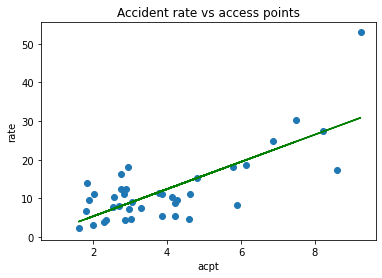

In [57]:
plt.scatter(data['rate'], data['acpt'])
plt.title("Accident rate vs access points")
plt.ylabel("rate")
plt.xlabel("acpt")
plt.plot(Y,result.params.rate*Y + result.params.const,color='green')

### Problem 4
Let z equal the variable that is highly negatively correlated with y found in problem 1.  Fit a second linear regression model with $y$ equal to 'rate' as the dependent variable and $x$ the same as in problem 2, but this time let it be of the form $y\approx \alpha_0 + \alpha_1x + \alpha_2z$.  Display the summary statistics and report the intercept, coefficients $\alpha_0,\alpha_1,\alpha_2$, and $R^2$ value.

In [61]:
Z = data[['acpt', 'slim']]
Y = data['rate']
Z = sm.add_constant(Z)
Z

,const,acpt,slim
0,1.0,4.6,55
1,1.0,4.4,60
2,1.0,4.7,60
3,1.0,3.8,65
4,1.0,2.2,70
5,1.0,24.8,55
6,1.0,11.0,55
7,1.0,18.5,55
8,1.0,7.5,50
9,1.0,8.2,50


In [63]:
model1 = sm.OLS(Y, Z)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     29.19
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           2.93e-08
Time:                        13:35:39   Log-Likelihood:                -62.799
No. Observations:                  39   AIC:                             131.6
Df Residuals:                      36   BIC:                             136.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4148      2.895      2.907      0.006       2.544      14.286
acpt           0.1146      0.030      3.822      0.001       0.054       0.175
slim          -0.1068      0.048     -2.236      0.032      -0.204      -0.010
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.710
Skew:                           0.325   Prob(JB):                        0.701
Kurtosis:                       2.875   Cond. No.                         811.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept and coefficient 𝛼0 is 8.4148, 𝛼1 is 0.1146, and 𝛼2 is -0.1068.
The R^2 value is 0.619.

### Problem 5   
Fit a quadratic regression model $y = a+ bx + cx^2$ where $x$ and $y$ are the variables from problem 2. Report the values of $a,b$, $c$, $R^2$ and the summary of the model. Compare and comment on the values of $R^2$ of this model and the model from 2. 

In [73]:
X = data['rate']
Y = data[['acpt']]
Y = Y.assign(acpt2 = X*X)
Y = sm.add_constant(Y)

In [74]:
model = sm.OLS(X, Y)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     462.4
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           2.12e-26
Time:                        17:22:41   Log-Likelihood:                -17.551
No. Observations:                  39   AIC:                             41.10
Df Residuals:                      36   BIC:                             46.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2220      0.106     21.054      0.000       2.008       2.436
acpt          -0.0218      0.012     -1.884      0.068      -0.045       0.002
acpt2          0.1023      0.005     19.529      0.000       0.092       0.113
==============================================================================
Omnibus:                        3.456   Durbin-Watson:                   1.135
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                2.776
Skew:                          -0.529   Prob(JB):                        0.250
Kurtosis:                       2.234   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The a value is const which is 2.222, the b value is acpt which is -0.0218, the c value is acpt2 which is 0.1023.
The R^2 value is 0.963.

R^2 in the first model was 0.566, the R^2 in this model 0.963. The quadratic regression model is a better representation of the prediction of the data.